In [179]:
from IPython.display import Image

In [ ]:
발표꼭지


### 1. 파이썬에서 어떤 함수라도 yield 키워드를 사용하면 "제너레이터 함수" generator factory가 된다    
    i.e. yield 함수가 포함된 함수를 호출하면 제너레이터의 인스턴스를 만든다
   
### 2. "제너레이터"는 "한 번에 하나씩 구성요소를 반환해주는 이터러블" 을 생성해주는 객체이다.    
    i.e. 제너레이터는 이터레이터이고(반대는 성립하지 않는다), 모든 제너레이터 객체는 이터러블이다

### 3. 제너레이터를 사용하는 주 목적은 메모리 절약이다.
    거대한 데이터 집합을 한꺼번에 메모리에 저장하는 대신 (시퀀스 객체를 쓰는 것처럼)
    "각 데이터 요소를 어떻게 만드는지 아는 객체"를 만들어서 필요할 때마다 하나씩만 가져오는 것이다. 
    이 기능은 게으른 연산(lazy computation)을 통해 무거운 객체를 사용할 수 있도록한다. 

### 4. 제너레이터는 코루틴으로 활용할 수 있다

In [4]:
x = [1, 2, 3]
dir(list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [177]:
def generator_func():
    yield 1
    yield 2
    yield 3

generator_func

<function __main__.generator_func()>

In [178]:
generator_func()

<generator object generator_func at 0x000001FD09601B30>

제너레이터에 대해 보기 전에 먼저 이터러블, 이터레이터에 대해 알아보자

# 이터레이션 , 이터러블 , 이터레이터

이터레이션(iteration) = 반복 

    : 어떤 데이터 집합이 있다고 할 때 그 안의 요소들에 하나씩 접근하는 것 
    StopIteration이 발생할 때까지 next() 메서드를 계속해서 호출하는 메커니즘


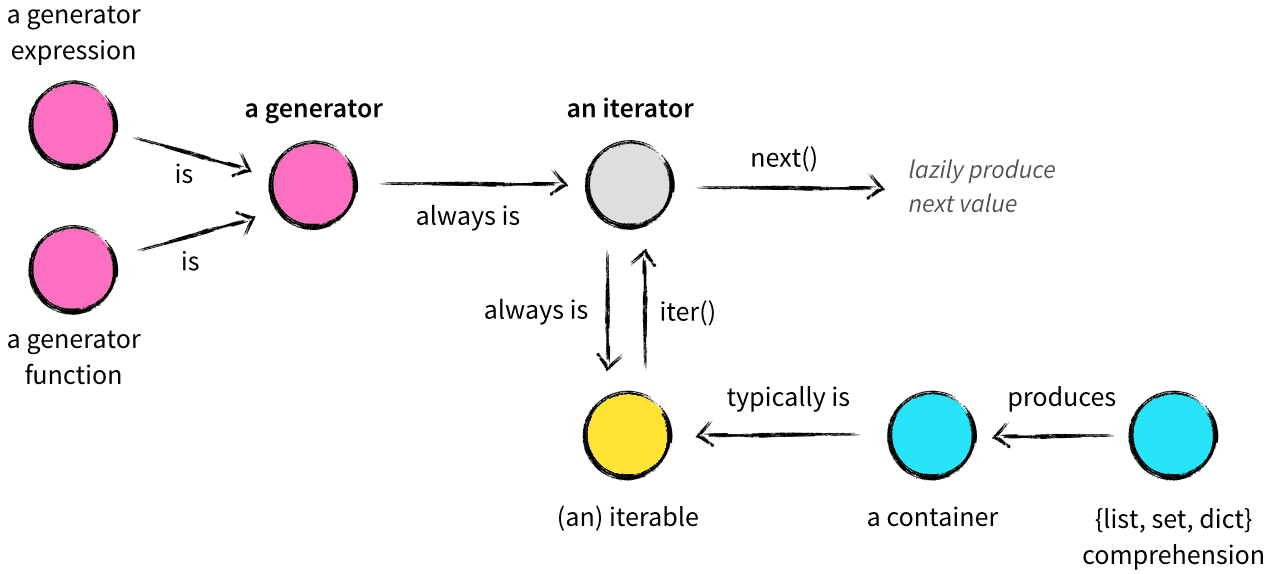

In [182]:
Image("g1.png", height = 800, width = 1000)

### Containers

In [ ]:
Containers are data structures holding elements, and that support membership tests. 
They are data structures that live in memory, and typically hold all their values in memory, too. 

In Python, some well known examples are:
list, deque, …
set, frozensets, …
dict, defaultdict, OrderedDict, Counter, …
tuple, namedtuple, …
str

Technically, an object is a container when it can be asked whether it contains a certain element. 
You can perform such membership tests on lists, sets, or tuples alike:

In [186]:
s = 'foobar'
assert 'foo' in s  # a string "contains" all its substrings

In [183]:
assert 1 in [1, 2, 3] # lists

In [184]:
assert 4 not in {1, 2, 3 } # sets

In [185]:
d = {1: 'foo', 2: 'bar', 3: 'qux'}  # Dict membership will check the keys:
assert 'foo' not in d

In [ ]:
most containers provide a way to produce every element they contain, (i.e. most containers are also iterable.)
that ability does not make them a container but an iterable.
Not all containers are necessarily iterable.
An example of this is a Bloom filter.

### Iterable

In [ ]:
An iterable is any object, not necessarily a data structure, 
that can return an iterator (with the purpose of returning all of its elements). 

이터러블(iterable) = 반복가능한 객체 

    : 어떤 객체에 __iter__ 메서드가 있으면 이터러블 객체다 (리스트, 문자열, 딕셔너리, 집합)
    
    이터러블은 자기 안에 이터레이터를 가지고 있거나 (바꿔 말하면, __iter__()메서드는 반드시 이터레이터를 반환해야 한다)
    자신이 시퀀스여야 한다
    
    cf) 파이썬의 내장함수 iter()는 그 함수의 인자로 쓴 이터러블의 __iter__() 메서드의 리턴값을 반환한다
    만약 어떤 객체가 이터레이터의 모든 요건을 가지고 있다면 
    __iter__() 메서드의 리턴값은 자기자신이 되도록 하는 것으로 충분해진다 ex) return self  (아래서 자세히 다루겠다)

예시

In [187]:
x = [1, 2, 3]
y = iter(x)

In [189]:
next(y)

1

In [190]:
print(type(x), type(y))

<class 'list'> <class 'list_iterator'>


In [ ]:
Here, x is the iterable, while y is a instance of an iterator, producing values from the iterable x
y holds state,

### Iterator

이터레이터(iterator) = 반복가능하면서 값을 차례대로 꺼낼 수 있는 객체 

    : 어떤 객체에 __next__ 매직메서드가 있으면 이터레이터다.
    cf) next() 내장함수는 이터레이터의 __next__() 메서드를 호출한다
       
    next() 내장함수는 이터러블을 다음 요소로 이동시키고 기존의 값을 반환한다 (즉 __next__ 매직 메서드가 반복 로직이다)
    이터레이터가 모두 소비되면(더 이상 반환할 값을 갖고 있지 않다면 Stopiteration 예외가 발생한다
    
    i.e. 보통 이터레이터는 일련의 연속적인 값 혹은 특정한 규칙을 가진 수열을 계산하는 값을 내부에 가지고 있고
    이를 __next__()가 호출될 때마다 다음 값을 리턴할 수 있는 객체다

이터레이터의 종류는 굉장히 많으며   
예컨대 itertools에 있는 모든 함수는 이터레이터를 반환한다  #https://docs.python.org/ko/3/library/itertools.html

정리, 이터러블을 이터레이터로 바꿔주면    
   
   
    __next__() 메서드를 사용하여 값을 차례대로 꺼낼수 있게 된다.
    꺼낼 게 더이상 없으면 StopIteration 예외를 발생시켜 반복을 끝낸다

예시

먼저 클래스의 인스턴스 관점으로 보면,

In [59]:
sample_list = [1, 2, 3]

In [60]:
dir(sample_list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [61]:
sample_list = sample_list.__iter__()  # __next__ 매직메서드를 갖고 있는 인스턴스로 변하는 것을 아래에서 확인할 수 있다
dir(sample_list) 

# 즉 리스트였던 sample_list 는 이제 이터레이터로 바뀌었다.

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [62]:
sample_list  

In [63]:
sample_list.__next__()

1

In [64]:
sample_list.__next__()

2

In [65]:
sample_list.__next__()

3

In [66]:
sample_list.__next__()

StopIteration: 

### 매직메서드 대신 내장함수 iter()를 써도 같은 결과를 얻는다

i.e. 내장함수의 인자로 클래스의 인스턴스를 주는 관점에서 보면

In [20]:
sample_list2 = ["a", "b", "c", "d"]
i = iter(sample_list2)
dir(i)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [68]:
i

In [69]:
while True:
    try:
        print(next(i))
    except StopIteration:
        break

a
b
c
d


### 두번째 인자로 특정 디폴트 조건을 주면 StopIteration 에러 대신 디폴트 값을 반환한다

In [120]:
word = iter("hello")
for i in word:
    print(i)


h
e
l
l
o


In [121]:
next(word, "default value")  

'default value'

### 질문
그러면 처음부터 이터레이터로 객체를 만들지   
   
   
왜 이터러블을 따로 이터레이터와 구분한걸까?


### 내가 생각한 답   
1. 어떤 객체가 이터러블인지 아닌지를 파이썬 내부적으로 검사하기 위해 __iter__와 __next__를 구분한 것 같다    
2. 시퀀스인 이터러블이 있을 수 있으므로, 그리고 이터러블이지만 이터레이터가 아닌 것도 있으므로
   
        시퀀스(sequence) : __len__ 과 __getitem__메서드가 있으면 시퀀스다.

        (0번 인덱스부터 한번에 하나씩 차례로 가져올 수 있으면 반복이 가능하다)

        리스트는 이터러블이지만 이터레이터가 아니다. __next__ 가 없으므로. 
        리스트는 시퀀스이기도 하다. __len__, __getitem__이 있으므로 


    
       어떤 객체를 반복하려고 할때 파이썬은 해당 객체의 iter() 함수를 호출한다.   
       이 함수가 처음 하는 일은 해당 객체에 __iter__ 메서드가 있는지 확인하는 것이다.   
       있으면 __iter__메서드를 실행한다(그 결과 이터레이터가 생성된다) 
       (없으면 __getitem__을 찾고 이 경우 인터프리터는 index error 예외가 발생할 떄까지 순서대로 값을 제공한다. 
       이것은 __iter__가 구현되지 않은 객체에서도 반복이 가능한 시퀀스 객체의 존재를 염두에 둔, 파이썬의 대비책이다. 
       __len__, __getitem__도 없으면 타입에러를 발생시킨다)   
       이런 식으로 이터러블 객체는 이터레이터를 생성하고 이터레이터를 사용해 반복을 한다 

정리, 시퀀스도 반복이 가능하지만


### 기본적으로 반복을 위한 객체를 디자인 할 때는 __iter__메서드를 구현해 정식 이터러블 객체를 만들어야 한다

    결국 for문에 리스트(이터러블 객체)를 넣고 돌렸을 때 
    for문이 하는 일은
    iter() 함수를 써서 이터러블을 이터레이터로 바꿔준 다음 
    next() 함수를 써서 이터레이터에서 값을 차례대로 꺼내 보여주고
    마지막 값을 넘어서면 StopIteration 을 발생시켜 반복을 끝내는 것이다

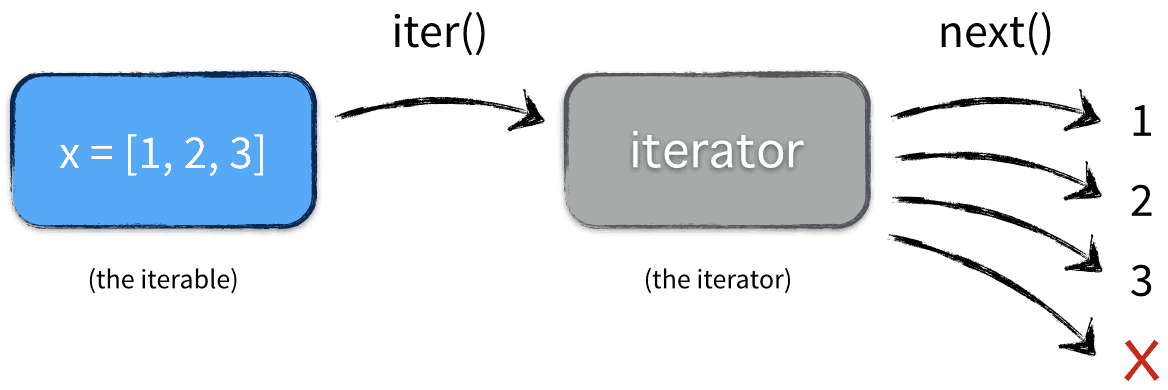

In [193]:
Image("g2.png", height = 400, width = 800)



    즉 반복연산의 핵심은 객체가 __iter__와 __next__를 가졌느냐에 있다.
    이를 바꿔 말하면
    그 객체는 파이썬의 "이터레이터(이터러블) 프로토콜"을 따른다고 말한다. 
    
    객체를 반복할수 있는지 확인하기 위해
    파이썬은 고수준에서 다음 두 가지를 차례로 검사한다. 
    
    1. 객체가 __next__ 나 __iter__ 중 하나를 포함하는지 여부
    2. 객체가 __len__ 과 __getitem__을 모두 가졌는지 여부 (시퀀스 인지 판단)




In [13]:
from datetime import timedelta
from datetime import date

class DateRangeIterable:
    """자체 이터러블 메서드를 가지고 있는 이터러블 객체다."""

    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
        self._present_day = start_date

    def __iter__(self):
        return self                  # 여기서 __iter__메서드는 객체 자체를 반환한다. 즉 여기서 이터레이터는 객체 자기자신이란 소리다.
                                     # 상기 이터러블의 정의에서 "이터러블은 자기 안에 이터레이터를 가지고 있거나 자신이 시퀀스여야 한다" 참고
                                       
    def __next__(self):
        if self._present_day >= self.end_date:
            raise StopIteration
        today = self._present_day
        self._present_day += timedelta(days=1)
        return today

In [85]:
iter1 = DateRangeIterable(date(2019, 1, 1), date(2019, 1, 5)) # 이렇게 만든 이터레이터는 
                                                             
",".join(map(str, iter1))    # 자신이 다른 함수의 인자로 호출될 때마다 자신을 소모한다.

'2019-01-01,2019-01-02,2019-01-03,2019-01-04'

In [86]:
max(iter1)  # 반복이 끝나면 자신을 다 소모해버려서 더이상 처음부터 다시 반복할 수 없게 된다 

ValueError: max() arg is an empty sequence

여기서 우리가 캐치해야할 포인트는   

    1. 
    이터레이터는 우리가 값을 요청할때까지 유휴상태인 게으른 팩토리처럼 보인다는 것이다.   
    즉 next()로 호출하면 하나의 값을 생성한 후 유휴 상태가 되고   
    다시 next()로 호출하면 다음 값을 생성한 후 다시 유휴 상태가 되는...
    
    2. next()를 통해 이터레이터가 자신을 다 소비해버리면 더이상 반복을 할 수 없다는 것

따라서 같은 내용을 다시 반복하려면   
반복할 이터러블 객체로부터 매번 새로운 인스턴스를 만들어 새로운 이터레이터를 만들면 된다

### 그런데 이렇게 하는 대신 __iter__에서 제너레이터를 사용할 수도 있다.
이게 무슨 말이냐면

In [ ]:
위에서 itrable을 설명할 때   
"이터러블은 자기 안에 이터레이터를 가지고 있거나 (바꿔 말하면, __iter__()메서드는 반드시 이터레이터를 반환해야 한다) 자신이 시퀀스여야 한다" 
고 말했다.

제너레이터는 이터레이터이므로 
어떤 객체의 __iter__() 가 제너레이터를 반환해도 (이터레이터를 반환하는 게 되므로)
이터러블은 그대로 유지된다는 것이다

바꿔 말하면
이터레이터 프로토콜을 구현한 새로운 컨테이너 클래스를 제공하는 것이다

아래 예시를 보자.

# 제너레이터 만들기

# 제너레이터 개요
# 제너레이터 표현식

In [217]:
from datetime import timedelta
from datetime import date

class DateRangeContainerIterable:
    """An range that builds its iteration through a generator."""

    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date

    def __iter__(self):
        current_day = self.start_date
        while current_day < self.end_date:
            yield current_day                # 앞서 제너레이터는 yield를 써서 만든다고 했다. __iter__가 제너레이터를 생성하고 있다. 
            current_day += timedelta(days=1)                                         # 다시 말해 여기서 __iter__는 제너레이터 함수다

In [218]:
iter2 = DateRangeContainerIterable(date(2019, 1, 1), date(2019, 1, 5)) 
                                                             
",".join(map(str, iter2))    # iter2 인스턴스를 map을 써서 반복할 때  __iter__가 호출되어 제너레이터를 생성한다. 
                                                                                   # (i.e. 이터레이터 객체를 만든다)
                                                                              

'2019-01-01,2019-01-02,2019-01-03,2019-01-04'

In [219]:
max(iter2)  # 우리는 제너레이터를 사용하고 있기 때문에 
            # 또다른 반복을 해도 (여기선 max 함수가 다시 자신의 인자로 들어온 이터러블을 이터레이션한다) __iter__가 호출되어
            # __iter__는 다시 제너레이터를 생성해 반복이 계속 가능해진다

datetime.date(2019, 1, 4)

### 즉 위 두 함수(map, max) 에서 생성된 두 이터레이터는 독립적으로 진행되고 소진되는 것이다!
이 접근법의 유일한 단점은 입력 데이터를 여러 번 읽는다는 것이다

### 위와 형태의 객체를 컨테이너 이터러블이라고 한다   
### 일반적으로 제너레이터를 사용할 때는 위와 같이 컨테이너 이터러블을 사용하면 유용하다.
   

      
      
그런데 단지 이터레이터로 제너레이터를 쓰기 때문에   
반복이 계속 가능해서만 유용한건 아니다!

먼저 이터러블과 시퀀스를 비교하여 이터레이터의 장점을 살펴보고,   
이터레이터와 제너레이터를 비교하여 제너레이터의 장점을 살펴보자

    우선 이터레이터의 장점은 메모리를 적게 사용한다는 것이다.
    위의 DateRangeIterable 예에선 한번의 하나의 날짜만 보관하고
    한번에 하나씩 날짜를 생성하기 때문이다. 
    그러나 n번째 요소에 도달하기 위해선 n번 반복해야 하므로 메모리와 CPU사이에 트레이드 오프가 있게 된다
    반면 시퀀스를 사용하면 모든 걸 한번에 보관하므로 더 많은 메모리가 사용되지만 인덱싱의 시간복잡도는 상수시간에 가능해진다

    그런데   
    이터레이터는 시퀀스처럼 모든 값을 한번에 저장하고 있진 않지만 
    (다시 말해 원하는 값을 차례대로 만들어 낼 수 있는 개별적인 동작이라는 점에서 여전히 시퀀스보다 메모리에 이점이 있지만)
    어쨌든 얻어낸 모든 값들을 메모리에 올릴 땐 한번에 적재 시켜야 한다.

    반면
    제너레이터는 yield가 한번 호출되면 (서브루틴인)함수가 잠시 대기 상태에 들어가고
    (메인루틴으로)결과값을 반환한 후 
    다시 함수로 돌아와 다시 yield를 만나면 함수가 다시 대기 상태에 들어가고
    결과값을 반환한 후
    다시 함수로 돌아오는 식으로 작동하므로   
### 결과적으로 메모리에 값을 하나씩 적재하게 되어 시퀀스와 이터레이터의 메모리 이슈를 해결할 수 있다!!!  

구체적인 예시는 다음과 같다

In [203]:
from itertools import islice

def fib():
     prev, curr = 0, 1
     while True:
         yield curr
         prev, curr = curr, prev + curr

f = fib()  # f가 호출될 때 제너레이터가 인스턴스화 되어 반환된다. 
           # 이 상태에선 아무런 코드도 실행되지 않는다. 즉 제너레이터는 초기에 유휴상태에서 시작한다.
list(islice(f, 0, 10))             # 좀더 명확하게는 prev, curr = 0, 1 코드는 아직 실행되지 않은상태다.
type(f)

generator

In [204]:
list(islice(f, 0, 10))  # 여기서 f(제너레이터 인스턴스)는 islice로 래핑돼 있는데 islice 또한 이터레이터이므로 아직까지 유휴상태다.
                        # 그리고 이들은 다시 리스트로 래핑돼있는데 바로 여기서부터 리스트 객체는 자신의 인자들(islice, f)을 모두 소비해 리스트를 만들어낸다
                        # 구체적으로 말하면 리스트는 islice() 인스턴스에서 next()를 호출하기 시작하며
                        # 또한 islice는 f 인스턴스에서 next()를 호출하는 것이다. 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

위 함수의 코드가 실행되는 매 스텝을 설명하면 다음과 같다.   
 
 1.
 
    첫번째 호출시 prev, curr = 0, 1이 실행되고, 
    while True 루프에 들어가 yield curr 구문을 만난다. 여기서 현재 curr 변수에 저장된 값을 생성하고 난 후 유휴상태로 들어간다. 

2.

    curr에 저장된 값은 islice() 래퍼에 전달되어 생성되고, 이제 리스트 객체는 값1을 리스트에 추가한다. 
    이제 다시 리스트는 다음 값을 islice()에 요청하고 islice()는 f에게 다음값을 요청한다


 3.
 
 
    이때 제너레이터 f의 유휴상태가 풀리면서 prev, curr = curr, prev + curr 코드를 실행한다. 
    그리고 다시 while loop에 재진입해 yield curr 구문을 만나 업데이트 된 값을 반환하고 다시 유휴상태로 들어간다.
    
    이 과정이 10번 반복되고나면 
    리스트는 islice()에 11번째 값을 요청할 텐데
    islice()는 StopIteration 예외를 발생시키고(인자로 끝 인덱스를 10으로 줬으므로)
    리스트는 결과값을 반환한다.

좀 더 구체적인 예시

In [ ]:
제너레이터의 타입은 두가지가 있다. 지금까지 살펴본 "제너레이터 함수" 와 "제너레이터 표현식" 이다
제너레이터 함수는 yield 키워드를 포함한 모든 함수를 말한다고 했다
제너레이터 표현식은 리스트 컴프리헨션과 동일한 제너레이터다.

아래는 제너레이터 표현식을 써서 이터레이터와 제너레이터의 차이를 보여주는 코드 예시다.

# cf) 제너레이터 표현식을 제너레이터 컴프리헨션으로 불러야한다는 주장도 있다 한다.
# 제너레이터에 대해서만 유독 제너레이터 표현식이라 부른다고 한다

In [207]:
sample_list2 = ["a", "b", "c", "d"]

In [208]:
import time

def print_iter(iter):
    for element in iter:
        print(element)
        
def lazy_return(num):
    print("sleep 1s")
    time.sleep(1)
    return num

print("일반 이터레이터 :")
list_comprehension = [lazy_return(i) for i in sample_list2]  # 13번 코드를 다 수행하고                 
print_iter(list_comprehension)                               # 14번 코드를 수행한다. 
                                        # 바꿔 말하면 리스트를 먼저 다 생성한 다음 (생성과 동시에 메모리에 올라가며)
                                        # 그리고 그 리스트를 출력한다 
        

print("제너레이터 :")
generator_expression = (lazy_return(i) for i in sample_list2)  # 20번 코드를 수행해서 서브루틴을 만들고
print_iter(generator_expression)                               # 21번 코드를 수행해서 메인루틴을 만든다 
                                                               # 20번, 21번 코드를 왔다갔다 수행한다.
                                        # 바꿔 말하면 제너레이터 인스턴스가 만들어진 다음 sample_list2의 첫번째 원소가 yield되고 유휴상태에 들어가면
                                        # print_iter는 첫번째 원소를 출력후 다음 원소를 요청하고 이 요청이 다시 제너레이터의 유휴상태를 풀어 
                                        # 다음 두번째 원소를 반환하게 한 다음 이 과정이 반복.

일반 이터레이터 :
sleep 1s
sleep 1s
sleep 1s
sleep 1s
a
b
c
d
제너레이터 :
sleep 1s
a
sleep 1s
b
sleep 1s
c
sleep 1s
d


In [9]:
a = set()
a.add(1)
a.add(2)
a.add(13)
for i in a:
    print(i)

1
2
13


In [13]:
from itertools import islice
a = [1, 2, 3, 4]
type(islice(a, 1, 2))


itertools.islice

In [15]:
a = (i for i in range(1, 10))
list(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
list(range(1, 10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
list_comprehension

['a', 'b', 'c', 'd']

In [44]:
generator_expression  # 제너레이터 표현식은 즉시 이터레이터로 평가되어 next함수를 사용해 값을 얻어와야 한다

<generator object <genexpr> at 0x0000021219932EB0>

### 제너레이터도 결국 이터레이터라는 것을 보여주는 예시

제너레이터는 이터레이터이므로   
이터레이터와 마찬가지로 __iter__() 와 __next__()를 구현한다   
따라서 next() 함수를 제너레이터 객체에 사용하면 다음 요소로 반복 또는 이동이 가능해진다   
   


In [46]:
generator_expression = (lazy_return(i) for i in sample_list2) 

In [47]:
type(generator_expression)

generator

In [70]:
dir(generator_expression)  # __iter__, __next__ 가 있다.

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [48]:
next(generator_expression)

sleep 1s


'a'

In [49]:
next(generator_expression)

sleep 1s


'b'

In [50]:
next(generator_expression)

sleep 1s


'c'

In [51]:
next(generator_expression)

sleep 1s


'd'

In [52]:
next(generator_expression)

StopIteration: 

    헷갈리지 말아야 할 것이 제너레이터는 "이터레이터이기도 하기" 때문에 next()로 값을 꺼낼 수 있는 것이고
    원소를 모두 소비했을 때 StopIteration 예외가 일어나는 것이다.
    제너레이터를 사용해 이터레이터 프로토콜을 따르는 이터러블 객체를 만들면 위 문제는 해소된다

정리,

    제너레이터를 쓰면 입력길이가 아무리 길어도 일단 반환되는건 이터레이터 이므로 
    이터레이터를 돌려야만 메모리를 먹게 되어 메모리 관리가 좋아진다.
    데이터 사이즈가 매우 크면 한번에 메모리에 올릴 수 없지만
    차례차례 나눠서 올리면 (lazy computation / lazy evaluation / lazy loading) 
    메모리 할당량이 적어져 부담을 줄일 수 있다.

따라서

    항상 리스트 컴프리헨션 대신에 제너레이터 표현식을 사용해서   
    min(), max(), sum() 같은 이터러블 연산함수에 전달하라   
    이것이 파이써닉하고 더 효율적인 방식이다

## 제너레이터를 사용할 때의 장점은 메모리 이슈 뿐만 아니라
## 더 간결하고 직관적인 코딩이 된다는 점도 있다

In [67]:
text = '컴퓨터(영어: Computer, 문화어: 콤퓨터, 순화어:전산기)는 진공관'

def index_words(text):
    result = []
    if text:
        result.append(0)  # 맨 처음 단어의 시작 인덱스 0 추가 
        
    for index, letter in enumerate(text):
        if letter == ' ':
            result.append(index+1)   # 시퀀스에서 각 단어의 시작 인덱스를 모은다.
    return result

result = index_words(address)
print(result)

[0, 8, 18, 23, 28, 38]


In [68]:
def index_words_iter(text):
    if text:
        yield 0                 # 제너레이터는 yield식을 사용하는 함수에 의해 만들어진다.
    for index, letter in enumerate(text):            
        if letter == ' ':
            yield index + 1      

it = index_words_iter(address)  
print(next(it))
print(next(it))


0
8


## 제너레이터와 itertools 라이브러리를 같이 사용하면 매우 효과적인 코딩을 할 수 있다

In [ ]:
상기
"""
이터레이터의 종류는 굉장히 많으며
예컨대 itertools에 있는 모든 함수는 이터레이터를 반환한다
참고 https://docs.python.org/ko/3/library/itertools.html
""" 


### 여러 이터레이터 연결하기

In [225]:
import itertools

In [226]:
# chain

it = itertools.chain([1, 2, 3], [4,5,6])
print(list(it))

[1, 2, 3, 4, 5, 6]


In [227]:
# repeat

it = itertools.repeat('안녕', 3)
print(list(it))

['안녕', '안녕', '안녕']


In [228]:
# cycle

it = itertools.cycle([1, 2])
result = [next(it) for _ in range (10)]
print(result)

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


In [229]:
"""
tee : 한 이터레이터를 병렬적으로 두 번째 인자로 지정된 개수의 이터레이터로 만들고 싶을 때
이 함수로 만들어진 각 이터레이터를 소비하는 속도가 같지 않으면, 처리가 덜 된 이터레이터의 원소를
큐에 담아둬야 하므로 메모리 사용량이 늘어난다
"""

it1, it2, it3 = itertools.tee(['하나', '둘'], 3)
print(list(it1))
print(list(it2))
print(list(it3))

['하나', '둘']
['하나', '둘']
['하나', '둘']


In [230]:
# zip_longest

keys = ['하나', '둘', '셋']
values = [1, 2]

normal = list(zip(keys, values)) # 그냥 zip은 짧은 쪽에 맞춰서 자른다 
print('zip:', normal)

it = itertools.zip_longest(keys, values, fillvalue='없음') # zip_longest는 긴쪽에 맞춰서 
                                                          # fillvalue로 지정한 값을 채워 넣어준다
longest = list(it)
print('zip_longest:', longest)

zip: [('하나', 1), ('둘', 2)]
zip_longest: [('하나', 1), ('둘', 2), ('셋', '없음')]


### 이터레이터에서 원소 필터링하기

In [231]:
# islice : 이터레이터를 복사하지 않으면서 원소 인덱스를 이용해 슬라이싱 하고 싶을 때

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

first_five = itertools.islice(values, 5) # 끝값만 지정 
print('앞에서 다섯 개:', list(first_five))

middle_odds = itertools.islice(values, 2, 8, 2) # 시작값, 끝값, 중간값 
print('중간의 홀수들:', list(middle_odds))

앞에서 다섯 개: [1, 2, 3, 4, 5]
중간의 홀수들: [3, 5, 7]


In [232]:
# takewhile : 이터레이터에서 주어진 술어가 False를 반환하는 첫 원소가 나타날 때까지 원소를 돌려준다.

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
less_than_seven = lambda x: x < 7
it = itertools.takewhile(less_than_seven, values)
print(list(it))

[1, 2, 3, 4, 5, 6]


In [233]:
"""
dropwhile
이터레이터에서 술어가 False를 반환하는 첫 원소를 찾을 때까지 이터레이터의 원소를 건너뛰고
즉 술어가 True를 반환하는 동안 원소를 건너뛰고 False를 반환한다.
"""
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
less_than_seven = lambda x: x < 7
it = itertools.dropwhile(less_than_seven, values)
print(list(it))

[7, 8, 9, 10]


In [234]:
# filterfalse : 주어진 이터레이터에서 술어가 False를 반환하는 모든 원소를 돌려준다.

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
evens = lambda x: x % 2 == 0

filter_result = filter(evens, values)
print('Filter:', list(filter_result))

filter_false_result = itertools.filterfalse(evens, values)
print('Filter false:', list(filter_false_result))

Filter: [2, 4, 6, 8, 10]
Filter false: [1, 3, 5, 7, 9]


### 이터레이터에서 특정한 조합 만들어내기

In [235]:
"""
accumulate
파라미터를 두개 받는 함수(이항함수)를 반복적용하면서 이터레이터 원소를 값 하나로 줄여준다.
이 함수가 돌려주는 이터레이터는 원본 이터레이터의 각 원소에 대해 누적된 결과를 내놓는다
"""

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sum_reduce = itertools.accumulate(values) # 주어진 이터레이터 원소의 누적합
print('합계:', list(sum_reduce))

def sum_modulo_20(first, second):
    output = first + second
    return output % 20

modulo_reduce = itertools.accumulate(values, sum_modulo_20)
# 파라미터를 두개 받는 함수(이항함수)를 
print('20으로 나눈 나머지의 합계:', list(modulo_reduce))

합계: [1, 3, 6, 10, 15, 21, 28, 36, 45, 55]
20으로 나눈 나머지의 합계: [1, 3, 6, 10, 15, 1, 8, 16, 5, 15]


In [236]:
"""
product
하나 이상의 이터레이터에 들어 있는 아이템들의 데카르트 곱을 반환한다.
리스트 컴프리헨션을 깊이 내포시키는 대신 이 함수를 사용하면 편리하다 
"""
single = itertools.product([1, 2], repeat=2)
print('리스트 한 개:', list(single))

multiple = itertools.product([1, 2], ['a', 'b'])
print('리스트 두 개:', list(multiple))

리스트 한 개: [(1, 1), (1, 2), (2, 1), (2, 2)]
리스트 두 개: [(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]


In [237]:
"""
permutations
원본 이터레이터의 원소가 모두 다 다르다고 가정하고 순열을 만들어낸다. 
만들어지는 원소의 순서는 원소의 실제 값에 의해 결정되지 않고 
원래 이터레이터에서 원소 인덱스의 사전식 오름차순으로 결정된다
즉 0번째 원소가 최초로 나열된 순열이 더 먼저 나오고, 그 후에 첫 번쨰 원소가 최초인 순열들이 나오는 식이다.
따라서 혼란을 방비하려면 원본 이터레이터에서 값이 중복되는 일이 없게 하고 정럴해 사용하라 
"""

it = itertools.permutations([1, 2, 3, 4], 2)
print(list(it))

[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4, 3)]


In [238]:
# combinations : 원본 이터레이터의 원소가 모두 다 다르다고 가정하고 조합을 만들어낸다. 

it = itertools.combinations([1, 2, 3, 4], 2)
print(list(it))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [239]:
# combinations_with_replacement : 원본 이터레이터의 원소가 모두 다 다르다고 가정하고 중복조합을 돌려 준다. 

it = itertools.combinations_with_replacement([1, 2, 3, 4], 2)
print(list(it))

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)]


## 마지막으로 제너레이터를 코루틴으로 활용할 수 있다

In [ ]:
파이썬에서 코루틴은 비동기 프로그래밍 ( 특정 시간에 프로그램을 일시중단하고 다시 시작) 을 목표로 한다   
즉 여러 코루틴이 특정 순서로 동작하도록 스케듈링 할 수 있으며   
일시 정지된 yield from 코루틴과 통신을 할 수 있다.

제너레이터와 코루틴은 문법적으로(기술적으로) 동일하지만 의미적으로는 다르다   
효율적인 반복을 원할 때는 제너레이터를 사용하고, 논블로킹 I/O 작업을 원할 때는 코루틴을 사용한다.   

# 동기/비동기/블로킹/논블로킹 IO 참고자료 : https://baek-kim-dev.site/38

좀더 명확한 분류를 위해   
파이썬 3.5 이전에는 yield from 구문을 사용해 코루틴으로 활용했다면   
3.5 이후버전 부터는 코루틴이라는 새로운 타입이 추가되었다.
새로운 구문으로 await와 async def가 추가되었고   
await는 yield from을 대신하기 위한 용도로 awaitable객체에 대해서만 동작한다. (코루틴은 awaitable이다)
async def는 코루틴을 정의하는 새로운 방법이다. 

파이썬에서 비동기 프로그래밍을 한다는 것은 일련의 코루틴을 관리하는 이벤트 루프가 있다는 뜻이다   
(이벤트 루프는 표준라이브러리의 asyncio를 뜻한다)   
일련의 코루틴들은 이벤트 루프에 속하며, 이벤트 루프의 스케쥴링 메커니즘에 따라 호출된다 

각각의 코루틴이 실행되면 사용자가 작성한 내부 코드가 실행되고   
다시 이벤트 루프에 제어권을 반납하려면 await <coroutine>을 호출하면 된다   
await <coroutine>은 yield처럼 호출자(이벤트 루프)에 제어권을 넘겨줌으로써   
이벤트 루프가 작업을 비동기적으로 관리할 수 있게 해준다. 

In [ ]:
제너레이터를 코루틴으로 쓸 수 있다는게 무슨 말일까?

In [224]:
def generator_func():
    yield 1
    yield 2
    yield 3

g = generator_func()

next(g)

1

In [ ]:
위에서 제너레이터는 자신의 호출자인 next()의 통제를 받는다고 볼 수 있다. 
즉 제너레이터는 외부에서 실행을 관리할 수 있는 객체처럼 보인다.

In [ ]:
from itertools import islice

def fib():
     prev, curr = 0, 1
     while True:
         yield curr
         prev, curr = curr, prev + curr

f = fib() 
list(islice(f, 0, 10))  # 여기서도 f의 호출자인 islice(), list()는 f를 통제하고 있고 (바꿔말해 f는 리스트에 의해 실행이 관리되고 있고)

In [ ]:
import time

def print_iter(iter):
    for element in iter:
        print(element)
        
def lazy_return(num):
    print("sleep 1s")
    time.sleep(1)
    return num


print("제너레이터 :")
generator_expression = (lazy_return(i) for i in sample_list2) 
print_iter(generator_expression)     

# 여기서도 generator_expression 은 print_iter에 의해 실행이 통제되고 있다

In [ ]:
그렇다면 이런 제너레이터의 성질을 이용해서 
어떤 두 함수를 서로 통신하게끔 만들어 볼 수 있지 않을까?

더 나아가 복수의 함수들끼리 서로 통신가능하게 할 수 있지 않을까?

이게 제너레이터를 활용해 코루틴을 형성할 수 있는 아이디어인것 같다.

In [ ]:
yield식을 사용한 제너레이터 함수가 만들어내는 데이터 채널은 단방향이다.
다른 데이터를 받아들이게 하려면 어떻게 해야 할까?

In [35]:
import math

# 진폭이 3으로 고정된 라디오파를 생성하는 함수
def wave1(amplitude, steps):   
    step_size = 2 * math.pi / steps
    for step in range(steps):
        radians = step * step_size
        fraction = math.sin(radians)
        output = amplitude * fraction
        yield output

# 생성된 값을 출력하는 함수
def transmit1(output):
    print(f'출력: {output:>5.1f}')

# 실행함수
def run1(it):
    for output in it:
        transmit1(output)
        
run1(wave1(3.0, 8))

출력:   0.0
출력:   2.1
출력:   3.0
출력:   2.1
출력:   0.0
출력:  -2.1
출력:  -3.0
출력:  -2.1


In [ ]:
여기서 진폭을 지속적으로 변경하면서 라디오파를 생성하도록 하려면 어떻게 해야할까?
위의 wave 제너레이터는 출력값을 내보낼 수만 있다.

### 제너레이터의 yield 키워드를 대입문 형식으로 작성하고
### send() 메서드를 사용해 제너레이터를 호출함으로써  
### 해당 제너레이터를 양방향 채널로 격상시켜준다

### 특히 send() 메서드는 제너레이터와 코루틴을 구분하는 기준이 된다
   

### case1 양방향 통신

In [1]:
def number_coroutine1():
    while True:      
        x = yield 1
        print(f'받은 값 = {x}')

co1 = number_coroutine1()

next(co1)  # yield 1 이 실행되어 제너레이터 바깥으로 1이 반환되고 유휴

1

In [2]:
next(co1) # while loop에 재진입해 send()로 받은게 없으므로 print()는 None을 출력하고
         # 다시 yield 1 리턴하고 유휴 

받은 값 = None


1

In [3]:
co1.send(1) # send()로 값을 보내면 유휴 풀리고 x에 호출자가 보낸 값이 print(x)로 출력되고 
           # 다시 yield 1 리턴하고 유휴

받은 값 = 1


1

### case2 제너레이터가 값을 받기만하고 내놓는 건 없는 단방향 통신

In [4]:
def number_coroutine2():
    while True:      
        x = yield     # yield 에 아무것도 반환하지 않게 하면 
        print(f'받은 값 = {x}')

co2 = number_coroutine2()

print(next(co2))      # 최초 제너레이터 호출시 None 반환후 유휴

None


In [5]:
next(co2)             # 재호출시 역시 아직 받은 값이 없으므로  print(x)는 None 출력후
                     # while문에 재진입해 None 반환후 유휴 

받은 값 = None


In [6]:
co2.send(1)
co2.send(2)
co2.send(3)

받은 값 = 1
받은 값 = 2
받은 값 = 3


### case3 같은코드?

In [7]:
def number_coroutine3():
    while True:      
        x = (yield)   # 괄호를 씌워주면 결과는 case2와 같은데 그냥 뭔가 함수를 호출하는 느낌을 준다고
        print(f'받은 값 = {x}')

co3 = number_coroutine3()

print(next(co3))  # 최초 제너레이터 호출시 None 반환후 유휴

None


In [8]:
next(co3)       # 재호출시 역시 아직 받은 값이 없으므로  print(x)는 None 출력후
                # while문에 재진입해 None 반환후 유휴 

받은 값 = None


In [9]:
co3.send(1)
co3.send(2)
co3.send(3)

받은 값 = 1
받은 값 = 2
받은 값 = 3


    즉 yield 키워드는 두 가지 일을 할 수 있다.
    함수 바깥으로 값을 내보내거나   (호출자인 next()의 호출에 의해서)
    함수 바깥에서 값을 받아오거나   (send()메서드를 통해서)

    코루틴(제너레이터)에 값을 전송하는 것은 제너레이터가 유휴 상태일 때만 가능하다.   
    따라서 코루틴을 최초로 구동해 일단 유휴상태에 접어들게 해야한다.   

    코루틴을 유휴 상태로 진입하게하는 방법은 
    위처럼 next()를 사용해 코루틴을 한번 호출하거나
    send(None)을 보내는 방법이 있다. 

In [10]:
def number_coroutine4():
    while True:      
        x = yield 2
        print(f'받은 값 = {x}')

co4 = number_coroutine4()

co4.send(None)

2

반면   
yield 구문을 코루틴이 가능하게 위처럼 작성해도   
   
   
send()를 쓰지 않고 next()만 쓴다면   
    
    (for loop등 반복을 수행하는 어떤 함수로든 래핑을 해서 이터레이션을 한다면)
   
   
결과적으론 일반적인 제너레이터를 쓰는 것이 된다

### 이제 라디오파 함수의 진폭을 변경할 수 있는 코루틴은 다음과 같이 만들 수 있다

In [28]:
import math

# def wave(amplitude, steps):   
def wave2(steps):   
    step_size = 2 * math.pi / steps
    amplitude = yield       # 초기 진폭을 받는 코드를 추가 
    for step in range(steps):
        radians = step * step_size
        fraction = math.sin(radians)
        output = amplitude * fraction
#         yield output
        amplitude = yield output # 외부에서 받은 진폭의 라디오파를 출력하고, 다음에 받게될 진폭값을 받는 코드를 추가 

실행함수도 계속해서 진폭값이 달라지도록 제너레이터에 스트리밍되게 코드를 바꿔줘야 한다

In [29]:
# 생성된 값을 출력하는 함수
def transmit2(output):
    if type(output) == float:
        print(f'출력: {output:>5.1f}')
    else:
        print(f'출력: {output}')

# 실행함수도 수정
def run2(it):
#     for output in it:
#         transmit(output)

#코루틴을 유휴상태로 진입시켜 값을 받을 수 있게 하기위해 처음 값 None으로 설정
    amplitudes = [None, 7, 7, 7, 2, 2, 2, 2, 10, 10, 10, 10, 10]  
                 
    for amplitude in amplitudes:
        try:
            output = it.send(amplitude)
        except StopIteration:
            pass
        transmit2(output)
        
run2(wave2(12))

출력: None
출력:   0.0
출력:   3.5
출력:   6.1
출력:   2.0
출력:   1.7
출력:   1.0
출력:   0.0
출력:  -5.0
출력:  -8.7
출력: -10.0
출력:  -8.7
출력:  -5.0


### 복수의 제너레이터들을 모아서 하나로 합성하고 싶을 수도 있다
### 이럴 때 yield from을 쓸 수 있다

In [36]:
import math

# 진폭이 3으로 고정된 라디오파를 생성하는 함수
def wave1(amplitude, steps):   
    step_size = 2 * math.pi / steps
    for step in range(steps):
        radians = step * step_size
        fraction = math.sin(radians)
        output = amplitude * fraction
        yield output

# 생성된 값을 출력하는 함수
def transmit1(output):
    print(f'출력: {output:>5.1f}')

# 실행함수
def run1(it):
    for output in it:
        transmit1(output)


def complex_wave1():
    yield from wave1(7.0, 3)
    yield from wave1(2.0, 4)
    yield from wave1(5.0, 5)

run1(complex_wave1())

출력:   0.0
출력:   6.1
출력:  -6.1
출력:   0.0
출력:   2.0
출력:   0.0
출력:  -2.0
출력:   0.0
출력:   4.8
출력:   2.9
출력:  -2.9
출력:  -4.8


### 그렇다면 코루틴들도 합성할 수 있을 것이다

In [31]:
def complex_wave2():
    yield from wave2(3)
    yield from wave2(4)
    yield from wave2(5)

run2(complex_wave2())

출력: None
출력:   0.0
출력:   6.1
출력:  -6.1
출력: None
출력:   0.0
출력:   2.0
출력:   0.0
출력: -10.0
출력: None
출력:   0.0
출력:   9.5
출력:   5.9


    위에서 보다시피 중간중간 None이 나와 보기에 좋지가 않다   
    이렇게 코루틴을 합성할 때는 send()를 쓰지 않고
    서브루틴 함수에 이터레이터를 전달하는 게 좋은 방법이다

In [42]:
import math

# def wave(amplitude, steps):   
# def wave2(steps):   
def wave3(amplitude_it, steps):
    step_size = 2 * math.pi / steps
#     amplitude = yield        초기 진폭을 받는 코드를 삭제
    for step in range(steps):
        radians = step * step_size
        fraction = math.sin(radians)
        amplitude = next(amplitude_it) # 다음 입력 받기 
        output = amplitude * fraction
        yield output  
#         amplitude = yield output # 외부에서 받은 진폭의 라디오파를 출력하고, 다음에 받게될 진폭값을 받는 코드도 삭제


def complex_wave3(amplitude_it):
    yield from wave3(amplitude_it, 3)
    yield from wave3(amplitude_it, 4)
    yield from wave3(amplitude_it, 5)
    
    
# 실행함수
def run3():
#     for output in it:
#         transmit(output)

#     amplitudes = [None, 7, 7, 7, 2, 2, 2, 2, 10, 10, 10, 10, 10]  
    amplitudes = [7, 7, 7, 2, 2, 2, 2, 10, 10, 10, 10, 10]
    
    it = complex_wave3(iter(amplitudes)) # 서브루틴들에 이터레이터를 줌으로써 
                 
    for _ in range(len(amplitudes)):
        try:
#             output = it.send(amplitude)
            output = next(it)            # next()로 서브루틴에서 반환하길 원하는 값을 차례로 요청한다 
        except StopIteration:                  # >>> 이게 코루틴을 합성한건진 모르겠다
            pass
        transmit2(output)
        
run3()

"""
어쨌든 저게 가능한 이유는, 이터레이터는 상태가 있기 때문에 
complex_wave3에 내포된 제너레이터들은 
앞에 있는 제너레이터가 처리를 끝낸시점부터 데이터를 가져와 처리할 수 있다
이런 식으로 제너레이터들을 연쇄시켜 입출력이 차례로 처리되게 만들 수도 있다
"""

출력:   0.0
출력:   6.1
출력:  -6.1
출력:   0.0
출력:   2.0
출력:   0.0
출력:  -2.0
출력:   0.0
출력:   9.5
출력:   5.9
출력:  -5.9
출력:  -9.5


이 코드의 문제는 입력 제너레이터가 완전히 스레드 안전(thread-safe) 하다고 가정한다는 것이다.   
제너레이터가 항상 스레드 안전하지는 않다   
따라서 스레드 경계를 넘나들며 제너레이터를 사용해야 한다면 async함수가 더 나은 해법일 수도 있다   

In [ ]:
제너레이터와 코루틴은 문법적으로(기술적으로) 동일하지만 의미적으로는 다르다   
효율적인 반복을 원할 때는 제너레이터를 사용하고, 논블로킹 I/O 작업을 원할 때는 코루틴을 사용한다.   

# 동기/비동기/블로킹/논블로킹 IO 참고자료 : https://baek-kim-dev.site/38

좀더 명확한 분류를 위해   
파이썬 3.5 이전에는 yield from 구문을 사용해 코루틴으로 활용했다면   
3.5 이후버전 부터는 코루틴이라는 새로운 타입이 추가되었다.
새로운 구문으로 await와 async def가 추가되었고   
await는 yield from을 대신하기 위한 용도로 awaitable객체에 대해서만 동작한다. (코루틴은 awaitable이다)
async def는 코루틴을 정의하는 새로운 방법이다. 

파이썬에서 비동기 프로그래밍을 한다는 것은 일련의 코루틴을 관리하는 이벤트 루프가 있다는 뜻이다   
(이벤트 루프는 표준라이브러리의 asyncio를 뜻한다)   
일련의 코루틴들은 이벤트 루프에 속하며, 이벤트 루프의 스케쥴링 메커니즘에 따라 호출된다 

각각의 코루틴이 실행되면 사용자가 작성한 내부 코드가 실행되고   
다시 이벤트 루프에 제어권을 반납하려면 await <coroutine>을 호출하면 된다   
await <coroutine>은 yield처럼 호출자(이벤트 루프)에 제어권을 넘겨줌으로써   
이벤트 루프가 작업을 비동기적으로 관리할 수 있게 해준다. 